# Problem Description

**"Taxi Fare Guru: Total Amount Prediction Challenge"**
- We need to build the most accurate models for predicting the total amount paid by travelers for taxi rides.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Basic Package Imports

In [2]:
import os
import io
import seaborn as sns
import warnings
import inspect
from tabulate import tabulate

#To plot pretty pictures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlt

#Global Matplot setting
mlt.rc('figure',figsize=(8,6))
mlt.rc('axes',labelsize=6)
mlt.rc('xtick',labelsize=6)
mlt.rc('ytick',labelsize=6) 

import sklearn
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 

# to make this notebook's output stable across runs
random_state=10
np.random.seed(random_state)

#ignore warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore')



# Data Load

In [3]:
# Loading Sample Data
sample_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
orig_train_data= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
orig_test_data=  pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
print('orig_test_data :', orig_test_data.shape)
print('sample_data :', sample_data.shape)
print('orig_train_data :',  orig_train_data.shape)

# Always maintain original copy of data as best practices & further exploration on copy of it
test_data = orig_test_data.copy()
train_data = orig_train_data.copy()
print("")
print('train_data :', train_data.shape)
print('test_data :',  test_data.shape)

orig_test_data : (50000, 16)
sample_data : (1000, 2)
orig_train_data : (175000, 17)

train_data : (175000, 17)
test_data : (50000, 16)


In [4]:
display(test_data.head(10))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
5,0,2023-06-28 21:14:18,2023-06-28 20:41:25,1.0,0.50,1.0,N,194,154,Credit Card,3.5,6.812990,0.0,1.0,2.5,0.00
6,1,2023-06-29 13:36:18,2023-06-29 13:38:40,2.0,21.59,4.0,N,163,26,Credit Card,0.0,3.488711,0.0,1.0,0.0,1.75
7,1,2023-06-30 21:23:51,2023-06-30 22:52:18,1.0,2.48,1.0,N,146,192,Credit Card,1.0,6.146135,0.0,1.0,2.5,0.00
8,1,2023-06-28 23:48:47,2023-06-28 22:32:51,1.0,1.22,1.0,N,45,232,Credit Card,1.0,5.574140,0.0,1.0,2.5,0.00
9,1,2023-06-30 15:43:47,2023-06-30 16:00:15,1.0,1.04,1.0,N,254,238,Cash,0.0,2.988596,0.0,1.0,2.5,0.00


Inference:
- Not needed to add ID column here, can be done directly during submission

# 0. DummyClassifier

- Separate Train-Test data for Dummy Classifier
- This is just for first(Draft) submission

In [5]:
def DummyClassifier():
    all_columns = train_data.columns
    print("all_columns -> ", all_columns)
    # Copy all features leaving aside the label.
    X_dummy = train_data.drop("total_amount", axis=1)
    # Copy the label list
    y_dummy = train_data['total_amount']
    print('X_dummy :', X_dummy.shape)
    print('y_dummy :',  y_dummy.shape)

    # Splitting X & Y for train/test: Validation Copy from Train Data
    X_train_dummy,X_test_dummy,y_train_dummy,y_test_dummy = train_test_split(X_dummy,y_dummy,random_state=random_state,test_size=0.1)
    print('Training dataset size -> ', X_train_dummy.shape, ' & ', y_train_dummy.shape)
    print('Validation dataset size -> ', X_test_dummy.shape, ' & ', y_test_dummy.shape)
    return DummyClassifier_First_Submission.__call__


- DummyClassifier (First Submission)

In [6]:
def DummyClassifier_First_Submission():
    from sklearn.dummy import DummyRegressor
    dummy_regr = DummyRegressor(strategy="mean")
    dummy_regr.fit(X_train_dummy, y_train_dummy)
    y_test_pred = dummy_regr.predict(X_test_dummy)
    X_test_r2Score= dummy_regr.score(X_test_dummy, y_test_dummy)
    print("X_test_r2Score: ", X_test_r2Score)

    test_data_dummy = test_data.copy()
    test_data_dummy_pred = dummy_regr.predict(test_data_dummy)
    test_data_dummy_pred.shape
    return test_data_dummy_pred


# Data Exploration

> **Statistics and data info**

In [7]:
display(train_data.info())

""" Columns with Null: 
passenger_count        168923
RatecodeID             168923
store_and_fwd_flag     168923
congestion_surcharge   168923
Airport_fee            168923
"""

print("")
Num_features = train_data.select_dtypes(['int', 'float']).columns
Cat_features = train_data.select_dtypes(['object']).columns
print("Num_features -> ", Num_features)
print("Cat_features -> ", Cat_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

None


Num_features ->  Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')
Cat_features ->  Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')


In [8]:
train_data.head(6)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0
5,0,2023-06-29 16:31:14,2023-06-29 16:29:06,1.0,0.00,99.0,N,225,256,Credit Card,0.0,1.507831,0.0,1.0,44.70,0.0,0.0


In [9]:
#print(train_data['total_amount'].describe())
train_data.describe(include = 'all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,168923,175000.000000,175000.000000,175000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
unique,NaN,109877,109713,NaN,NaN,NaN,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-06-28 18:11:16,2023-06-29 19:08:22,NaN,NaN,NaN,N,NaN,NaN,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8,10,NaN,NaN,NaN,167729,NaN,NaN,135257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.728377,NaN,NaN,1.357678,5.145930,1.518307,NaN,132.710349,132.701429,NaN,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,NaN,76.148799,76.192493,NaN,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,NaN,NaN,1.000000,1.080000,1.000000,NaN,67.000000,67.000000,NaN,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,NaN,NaN,1.000000,1.840000,1.000000,NaN,133.000000,133.000000,NaN,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,NaN,NaN,1.000000,3.610000,1.000000,NaN,199.000000,199.000000,NaN,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000


> **Missing values - Null & Unknowns**

In [10]:
print("--- Train Data --\n")
print(train_data.nunique())

print("\n --- Test Data --\n")
print(test_data.nunique())

--- Train Data --

VendorID                      3
tpep_pickup_datetime     109877
tpep_dropoff_datetime    109713
passenger_count               9
trip_distance              2929
RatecodeID                    6
store_and_fwd_flag            2
PULocationID                264
DOLocationID                264
payment_type                  5
extra                        28
tip_amount               175000
tolls_amount                214
improvement_surcharge         4
total_amount               8164
congestion_surcharge          3
Airport_fee                   3
dtype: int64

 --- Test Data --

VendorID                     3
tpep_pickup_datetime     43216
tpep_dropoff_datetime    43205
passenger_count              8
trip_distance             2374
RatecodeID                   7
store_and_fwd_flag           2
PULocationID               264
DOLocationID               264
payment_type                 5
extra                       25
tip_amount               50000
tolls_amount               108
i

In [11]:
print("\n-- isnull & Unknowns in Data --")
train_data.isin(["?","unknown","N/A","n/a", np.nan]).sum() # checking unknown values


-- isnull & Unknowns in Data --


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type             2333
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [12]:
test_data.isin(["?","unknown","N/A","n/a", np.nan]).sum() # checking unknown values

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type              665
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

> **Analysing Target Label: Total_amount**

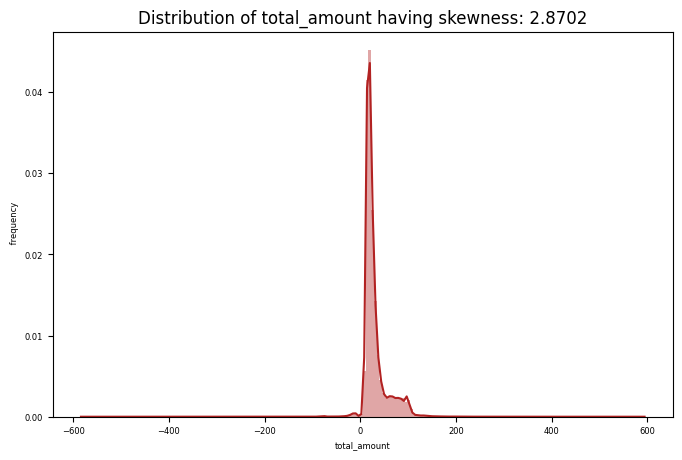

** Train **

Records with 676 (<0)negative fares.
Records with 22 #0 fares.
Records with 889 fares greater than #130.
Train min:  -576.75 , max:  587.25
(175000, 17)


In [13]:
# Distrubution of target variable with skewness
fig, ax = plt.subplots(figsize = (8,5))
sns.distplot(train_data.total_amount, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of total_amount having skewness: {:0.5}'.format(train_data.total_amount.skew()))
ax.set_ylabel(' frequency')
plt.show()

print("** Train **\n")
print(f"Records with {len(train_data[train_data['total_amount'] < -20])} (<0)negative fares.")
print(f"Records with {len(train_data[train_data['total_amount'] == 0])} #0 fares.")
print(f"Records with {len(train_data[train_data['total_amount'] > 130])} fares greater than #130.")
print("Train min: ", np.amin(train_data.total_amount),", max: ", np.amax(train_data.total_amount))
print(train_data.shape)

> Data seems right skewed and we will remove outliers in later section. 
- We can consider to keep Normal distribution range (95%) of data between 2.5 and 97.5 quantile range. And, only 4% (~8k) data are outside 95% range - we can drop them.
> We can even consider larger range of data between 0.05 and 99.5 quantile to include more records (as test data also has value in similar range).

In [14]:
#Getting Quantile values:
low_quantile = train_data.total_amount.quantile(0.005)
high_quantile = train_data.total_amount.quantile(0.995)
print(low_quantile, high_quantile)
print("Count < 0: ", train_data[train_data['total_amount'] <0].total_amount.count())
quantile_rng_count=train_data[(train_data['total_amount'] < low_quantile) | (train_data['total_amount'] > high_quantile) ].total_amount.count()
print("Count outside Quantile range: ", quantile_rng_count, " , % count: ", quantile_rng_count *100/len(train_data) )

## 0.025 - 0.975: 8457 - 4.83%
## 0.010 - 0.995: 2623 - 1.49%
## 0.015 - 0.995: 3466 - 1.98%

-16.8 130.38030000000026
Count < 0:  1725
Count outside Quantile range:  1736  , % count:  0.992


> **Reviewing Passenger_Count**

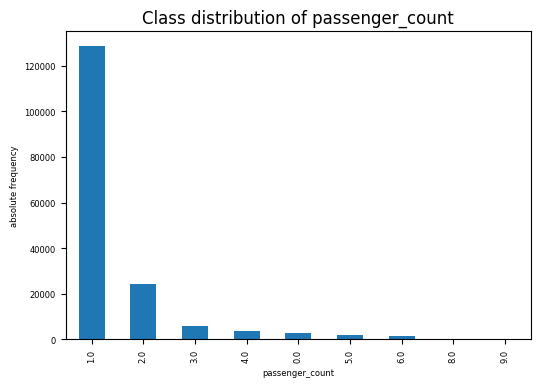

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64


-- test data --


passenger_count
1.0    36532
2.0     7155
3.0     1731
4.0     1062
0.0      781
5.0      546
6.0      413
8.0        1
Name: count, dtype: int64

In [15]:
# Distrubution of passenger_count
fig, ax = plt.subplots(figsize = (6,4))
class_dist = train_data.passenger_count.value_counts()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Class distribution of passenger_count')
ax.set_ylabel('absolute frequency')
plt.show()

display(class_dist)
print("\n-- test data --")
class_dist_test = test_data.passenger_count.value_counts()
display(class_dist_test)

> The class distribution is imbalanced since some classes outnumber some other classes in TRAIN data. Clearly, With passenger Count #1 is most frequent and anything beyond
 6 seems unreasonable. 
- Also reviewing same for TEST data, count > 6 is only 1.

> Inference

- so we can drop records with count 8 & 9 OR SET Max number of Passenger to 6.

> **Reviewing Vendor_ID**

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

<Axes: xlabel='VendorID', ylabel='total_amount'>

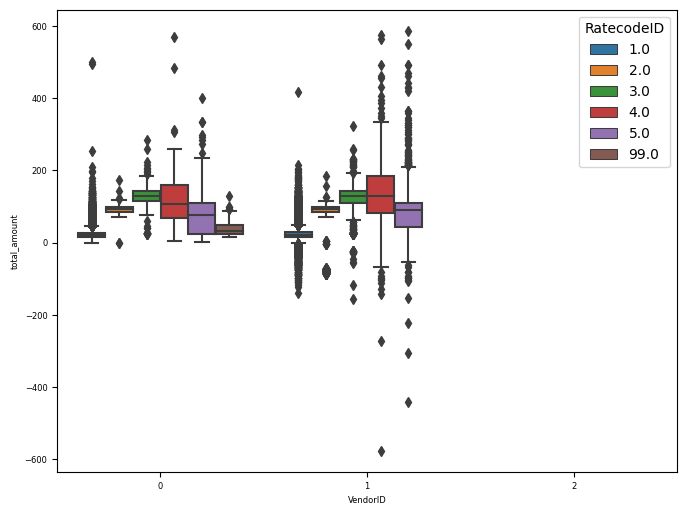

In [16]:
display(train_data.VendorID.value_counts())

# create grouped boxplot  
sns.boxplot(x = train_data.VendorID, 
            y = train_data.total_amount, 
            hue = train_data.RatecodeID)


- Most number of records is with Vedor_id =1 and even negative Fare price is also with same vendor (#1) - having rateCode_id #4 & #5

> **Analysing Drop & Pickup timing**

In [17]:
time_del = pd.to_datetime(train_data['tpep_dropoff_datetime']) - pd.to_datetime(train_data['tpep_pickup_datetime'])
df_r = train_data.copy()
df_r['ride_duration'] = time_del.dt.total_seconds()/60.0 #value in minutes
df_r.ride_duration.value_counts().sort_values(ascending=True, na_position='first')
print("% of records with -ve value:", len(df_r[df_r['ride_duration'] < 0])*100/len(df_r), "%")

print("\nride_duration -> Describe()")

display(df_r['ride_duration'].describe())
print(f"Records with {len(df_r[df_r['ride_duration'] < 0])} (<0)negative ride_duration.")
print(f"Records with {len(df_r[df_r['ride_duration'] == 0])} #0 ride_duration.")
print(f"Records with {len(df_r[df_r['ride_duration'] > 300])} ride_duration greater than #300.")
display(df_r[df_r.ride_duration > 300].head(3))

#display(df_r[df_r['ride_duration'] < 0])
print("\n")

display("--- Reviewing Pickup-Drop time in Test Data as well ---")
time_del_test = pd.to_datetime(test_data['tpep_dropoff_datetime']) - pd.to_datetime(test_data['tpep_pickup_datetime'])
df_r_test = test_data.copy()
df_r_test['ride_duration'] = time_del_test.dt.total_seconds()/60.0 #value in minutes
print("% of records with -ve value (Test data):", len(df_r_test[df_r_test['ride_duration'] < 0])*100/len(df_r_test))
#display(df_r_test[df_r_test['ride_duration'] < 0])
display(df_r_test['ride_duration'].describe())
print(f"Records with {len(df_r_test[df_r_test['ride_duration'] < 0])} (<0)negative ride_duration.")
print(f"Records with {len(df_r_test[df_r_test['ride_duration'] == 0])} #0 ride_duration.")
print(f"Records with {len(df_r_test[np.absolute(df_r_test.ride_duration > 300)])} ride_duration greater than #300.")
display(df_r_test[np.absolute(df_r_test.ride_duration > 300)].head(3))

% of records with -ve value: 37.528 %

ride_duration -> Describe()


count    175000.000000
mean         17.893002
std          62.263379
min        -118.900000
25%         -19.516667
50%          16.466667
75%          53.166667
max        1537.150000
Name: ride_duration, dtype: float64

Records with 65674 (<0)negative ride_duration.
Records with 19 #0 ride_duration.
Records with 132 ride_duration greater than #300.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,ride_duration
1270,1,2023-06-30 14:12:43,2023-07-01 14:09:40,3.0,1.33,1.0,N,155,246,Credit Card,0.0,1.799322,0.0,1.0,15.4,2.5,0.0,1436.950000
1673,1,2023-06-29 17:53:44,2023-06-30 19:19:07,5.0,0.81,1.0,N,20,125,Credit Card,2.5,1.213517,0.0,1.0,13.7,2.5,0.0,1525.383333
2413,1,2023-06-29 13:09:15,2023-06-29 23:05:34,1.0,2.10,1.0,N,70,77,Credit Card,0.0,5.705067,0.0,1.0,29.4,2.5,0.0,596.316667


'--- Reviewing Pickup-Drop time in Test Data as well ---'

% of records with -ve value (Test data): 37.156


count    50000.000000
mean        18.034757
std         64.505173
min       -117.316667
25%        -19.300000
50%         16.766667
75%         53.183333
max       4682.866667
Name: ride_duration, dtype: float64

Records with 18578 (<0)negative ride_duration.
Records with 7 #0 ride_duration.
Records with 33 ride_duration greater than #300.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,ride_duration
4050,1,2023-06-29 17:08:55,2023-06-30 16:55:30,1.0,2.41,1.0,N,156,258,Credit Card,2.5,7.044281,0.0,1.0,2.5,0.0,1426.583333
6630,1,2023-06-29 15:40:57,2023-06-30 16:32:21,1.0,1.76,1.0,N,142,251,Credit Card,0.0,4.282471,0.0,1.0,2.5,0.0,1491.400000
7467,1,2023-06-30 17:26:09,2023-07-01 15:18:51,1.0,5.72,1.0,N,47,109,Credit Card,2.5,10.610491,0.0,1.0,2.5,0.0,1312.700000


> - Some case trip duration(in Minutes) are negative values. And count of such records are significant (37+ %).
> - Also, there seems to be some outlier for Trip_Duration with values > 600 mins. This issue is prevalent in Test data as well.

- Inference:
> **We can derive ride Time & PickUp Hour - which can potentially impact total Fare**
> **We can drop DateTime timestamp from model analysis. However, Hour of booking might impact Total price and hence keeping Hour values from Pickup time.**

In [18]:
"""
train_data.PULocationID.value_counts().sort_values(ascending=False, na_position='first')
train_data.DOLocationID.value_counts().sort_values(ascending=False, na_position='first')
"""

"\ntrain_data.PULocationID.value_counts().sort_values(ascending=False, na_position='first')\ntrain_data.DOLocationID.value_counts().sort_values(ascending=False, na_position='first')\n"

> Inference: PULocationID & DOLocationID can be dropped as 260+ unique IDs are present. And, count of records per LocationID is almost evenly distributed.

> **Identity Columns**

**We can drop below ID type columns which has least significance on resultset: store_and_fwd_flag,PULocationID, DOLocationID**

In [19]:
id_cols = ["store_and_fwd_flag","PULocationID","DOLocationID"]

> **Different Surcharge Features**

In [20]:
"""
improvement_surcharge        4
congestion_surcharge         3
Airport_fee                  3
"""
display(train_data.improvement_surcharge.value_counts().sort_values(ascending=False, na_position='first'))
print("---")
display(train_data.congestion_surcharge.value_counts().sort_values(ascending=False, na_position='first'))
print("---")
display(train_data.Airport_fee.value_counts().sort_values(ascending=False, na_position='first'))
print("---")
display(train_data.payment_type.value_counts().sort_values(ascending=False, na_position='first'))
print("---")
display(train_data.RatecodeID.value_counts().sort_values(ascending=False, na_position='first'))

improvement_surcharge
 1.0    173145
-1.0      1725
 0.3        85
 0.0        45
Name: count, dtype: int64

---


congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64

---


Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64

---


payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

---


RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64

We will use Imputer to fill Values:
* "passenger_count" - Median 
* "congestion_surcharge" - Between median or constant (0.0)    #assuming no additional charge
* "Airport_fee" - Between median or constant (0.0)            #assuming no additional charge
* payment_type (Unknown) - Median   #Setting value to NULL to use imputer

* **Trip Distance vs Trip Amount Analysis**

In [21]:
print("trip_distance -> ", np.amin(train_data['trip_distance']), np.amax(train_data['trip_distance']))
display((train_data['trip_distance'] > 200).value_counts())
print("\n --- Train --")
print(f"Records with {len(train_data[train_data['trip_distance'] < 0])} (<0)negative trip_distance.")
print(f"Records with {len(train_data[train_data['trip_distance'] == 0])} #0 trip_distance.")
print(f"Records with {len(train_data[train_data['trip_distance'] > 200])} trip_distance greater than #200.")
display(train_data[train_data.trip_distance > 200])

print("\n --- Test --")
print(f"Records with {len(test_data[test_data['trip_distance'] < 0])} (<0)negative trip_distance.")
print(f"Records with {len(test_data[test_data['trip_distance'] == 0])} #0 trip_distance.")
print(f"Records with {len(test_data[test_data['trip_distance'] > 200])} trip_distance greater than #200.")
display(test_data[test_data.trip_distance > 200])




trip_distance ->  0.0 135182.06


trip_distance
False    174996
True          4
Name: count, dtype: int64


 --- Train --
Records with 0 (<0)negative trip_distance.
Records with 2632 #0 trip_distance.
Records with 4 trip_distance greater than #200.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
55147,1,2023-06-29 15:53:29,2023-06-29 15:52:58,1.0,9673.69,1.0,N,107,228,Credit Card,0.0,6.042202,0.0,1.0,9.60,0.0,0.0
70458,1,2023-06-30 23:03:21,2023-07-01 00:16:10,NaN,20314.00,NaN,NaN,249,84,Wallet,0.0,9.657420,0.0,1.0,42.56,NaN,NaN
85525,1,2023-06-29 05:23:56,2023-06-29 04:33:47,NaN,135182.06,NaN,NaN,133,80,Wallet,0.0,5.948871,0.0,1.0,27.92,NaN,NaN
107988,1,2023-06-29 03:32:14,2023-06-29 04:57:15,NaN,92292.43,NaN,NaN,55,71,Wallet,0.0,4.262185,0.0,1.0,18.00,NaN,NaN



 --- Test --
Records with 0 (<0)negative trip_distance.
Records with 742 #0 trip_distance.
Records with 1 trip_distance greater than #200.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
15870,1,2023-06-30 18:19:24,2023-06-30 19:54:59,NaN,17624.43,NaN,NaN,3,100,Wallet,0.0,6.040512,0.0,1.0,NaN,NaN


> Inference: Out of 175K records, 
trip_distance -> only 4 of them has values greater than 150 unit of distance in TRAIN data. We need to handle these Outlier records.
Also, looking at TEST data, 2 records have trip_distance > 150. We can consider to set Max Trip distance as 150.

> In both TRAIN & TEST dataset, 2632 & 742 respectively, has Trip distance as Zero but significant ride duration 

# Cleansing modules

In [22]:
"""
Adding ID column to Train & Test Data
"""
def add_id_column_to_dataset(df):
    print("Dataset Shape: ", df.shape)
    df_id = pd.DataFrame({'ID': (i for i in np.arange(1,df.shape[0]+1)) })
    frames=[df_id, df]
    new_df = pd.concat(frames,axis=1)
    print("New Dataset Shape: ", new_df.shape)
    return new_df


"""
Method to drop columns from DF
"""
def drop_columns_from_df(df2, colums_to_drop_list):
    print("Columns to drop from DF: ", colums_to_drop_list)
    new_df = df2.drop(colums_to_drop_list, axis=1, inplace = False)
    return new_df


"""
Update Payment_Type column 'unknown' values to Nan
"""
def update_payment_unknown_type(df):
    #print("Before (update_payment_unknown_type): ", train_data.isnull().sum())
    new_df = df.copy()
    new_df['payment_type'] = df['payment_type'].replace(['unknown'], np.nan)
    print("After (update_payment_unknown_type): ", train_data.isnull().sum())
    return new_df


"""
Filter Outlier Trip Distance rows from dataset. Instead of dropping the records, we can set Max value to 150
"""
def filter_outlier_trip_distance(df,allow_row_filter):
    """
    if allow_row_filter:
        #df['trip_distance'] = np.where(df['trip_distance']> 200, 200, df['trip_distance'])
        new_df = df[(df['trip_distance'] <= 200)]
    else:
        new_df = df.copy()
    """
    df['trip_distance'] = np.where(df['trip_distance']>= 200, 200, df['trip_distance'])
    new_df = df.copy()
    print("Max Trip Distance: ", np.amax(new_df.trip_distance))
    return new_df

"""
Filter Outlier Passenger Count rows from dataset
"""
def filter_outlier_passenger_count(df):
    #new_df = df[df.passenger_count <= 6]
    #df['passenger_count'] = np.where(df['passenger_count']> 6, 6, df['passenger_count'])
    print("Max passenger_count: ", np.amax(df.passenger_count))
    return df

"""
Filter Outlier Total_amount - Using Quantile
"""
def filter_outlier_total_amount(df):
    low_quantile = df.total_amount.quantile(0.001)   # 2.5 Quantile # 1.5 Q to drop less rec
    high_quantile = df.total_amount.quantile(0.999)  # 97.5 Quantile
    print("Quantile values for Total_amount: ", low_quantile, high_quantile)
    new_df = df[(df['total_amount'] >= low_quantile) & (df['total_amount'] <= high_quantile)]
    new_df['total_amount_dist'] = (np.floor(new_df.total_amount/5)) 
    return new_df

"""
Derive ride Time & PickUp Hour - which can potentially impact total Fare
Drop DateTime timestamp from model analysis.
"""
def data_prep_with_pickup_dropoff_time(df):
    df['pickup_hour']=pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
    time_delta = pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])
    #df['ride_duration'] = np.absolute(time_delta.dt.total_seconds()/60.0) #value in minutes  ## Absoulte value - negative duration doesn't makle sense
    df['ride_duration'] = time_delta.dt.total_seconds()/60.0 #value in minutes 
    ts_cols = ["tpep_pickup_datetime","tpep_dropoff_datetime"]
    df = drop_columns_from_df(df, ts_cols)
    print("New DF shape: ", df.shape)
    return df

def condition_based_df_update(df):
    # Negative Ride duration doesn;t make sense - so adjusting the value
    #df['ride_duration'] = np.where(df.ride_duration <= 0, np.nan , df['ride_duration'])
    df['trip_distance'] = np.where(np.absolute(df['trip_distance'])> 600, 600, df['trip_distance'])
    # Negative Tip/surcharge/additional Fee doesn't make sense : 
    
    #df['tip_amount'] = np.where(df.tip_amount < 0, np.nan, df['tip_amount'])
    #df['tolls_amount'] = np.where(df.tolls_amount < 0, np.nan, df['tolls_amount'])
    #df['improvement_surcharge'] = np.where(df.improvement_surcharge < 0, np.nan, df['improvement_surcharge'])
    #df['congestion_surcharge'] = np.where(df.congestion_surcharge < 0, np.nan, df['congestion_surcharge'])
    #df['Airport_fee'] = np.where(df.Airport_fee < 0, np.nan, df['Airport_fee'])
    #df['extra'] = np.where(df.extra < 0, np.nan, df['extra'])

    #df['Airport_fee'] = np.absolute(df.Airport_fee)
    print("New DF shape (after condition_based_df_update): ", df.shape)
    return df


In [23]:
def cleansing_module(dataset_df, allow_row_filter):
    print("Count(original) of given dataset: ", len(dataset_df))
    dataset_df = add_id_column_to_dataset(dataset_df)
    if allow_row_filter:
        outlier_total_amount = filter_outlier_total_amount(dataset_df)
        print("Count after outlier_total_amount(using Quantile): ", len(outlier_total_amount))
        
        dataset_df=outlier_total_amount
    
    df0 = filter_outlier_passenger_count(dataset_df)
    df1 = filter_outlier_trip_distance(df0,allow_row_filter)
    df_2 = update_payment_unknown_type(df1)
    df_3 = data_prep_with_pickup_dropoff_time(df_2)
    df_4 = condition_based_df_update(df_3)
    cleansed_df = drop_columns_from_df(df_4, id_cols)
    print("\n** updated shape after all changes: ", cleansed_df.shape,"\n")
    print(cleansed_df.head(3))
    return cleansed_df

> **- Apply cleansing to Train Data -**

In [24]:
cleansed_train_dataset = cleansing_module(train_data, True)

Count(original) of given dataset:  175000
Dataset Shape:  (175000, 17)
New Dataset Shape:  (175000, 18)
Quantile values for Total_amount:  -74.0 207.00036000000662
Count after outlier_total_amount(using Quantile):  174669
Max passenger_count:  9.0
Max Trip Distance:  200.0
After (update_payment_unknown_type):  VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64
Columns to drop from DF:  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
New DF shape:  (174669, 19)
New DF shape (after condition_based_df_update):  (174669, 19)

# Handling UnderSampling Cases

In [25]:
def add_undersampling_cases(cleansed_data):
    #df1 = cleansed_data[(np.absolute(cleansed_data.total_amount > 120)) | (cleansed_data.trip_distance >= 150) | (np.absolute(cleansed_data.ride_duration >= 500)) ]
    df1 = cleansed_data[(np.absolute(cleansed_data.total_amount > 110)) ]
    df2 = pd.concat([df1]*20, ignore_index=True)
    display(df2.shape, cleansed_data.shape)
    op_df = pd.concat([cleansed_data, df2], ignore_index=True)
    display(op_df.shape)
    return op_df



In [26]:
#cleansed_train_data = add_undersampling_cases(cleansed_train_dataset)
cleansed_train_data = cleansed_train_dataset.copy()

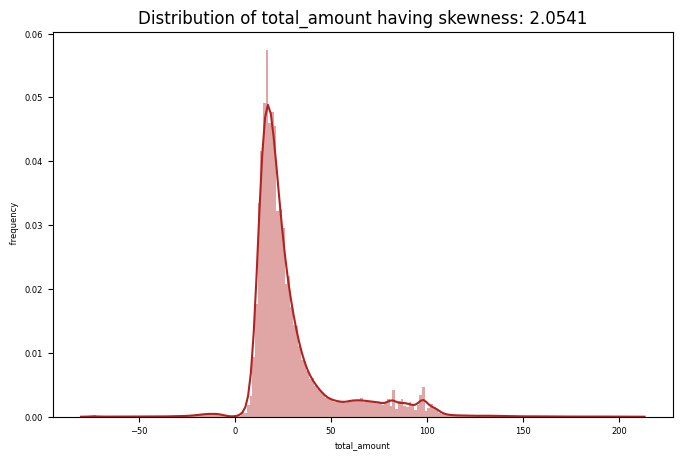

In [27]:
# Distrubution of target variable with skewness
fig, ax = plt.subplots(figsize = (8,5))
sns.distplot(cleansed_train_data.total_amount, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of total_amount having skewness: {:0.5}'.format(cleansed_train_data.total_amount.skew()))
ax.set_ylabel(' frequency')
plt.show()

# Data Visualization Post Cleansing

total_amount
True     173078
False      1591
Name: count, dtype: int64


<Axes: xlabel='total_amount', ylabel='Count'>

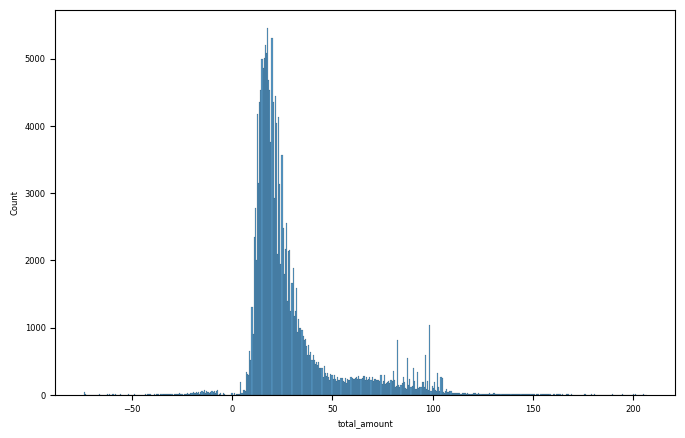

In [28]:
print((cleansed_train_data['total_amount'] > 0).value_counts())
plt.rc('figure',figsize=(8,5))
sns.histplot(cleansed_train_data['total_amount'])

> Total_amount < 0 doesn't make sense and can be dropped.

<Axes: xlabel='total_amount_dist', ylabel='Count'>

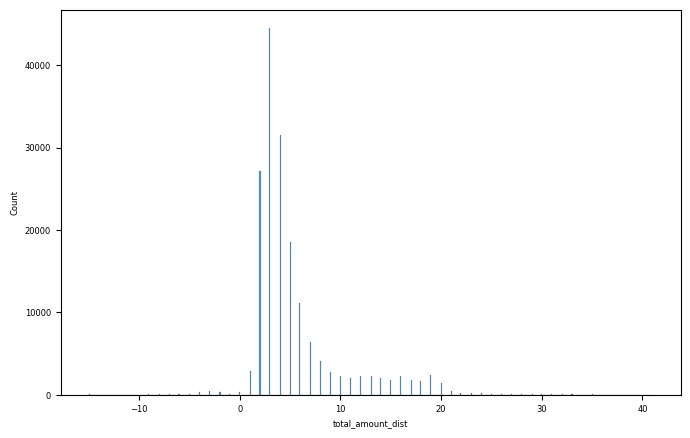

In [29]:
plt.rc('figure',figsize=(8,5))
sns.histplot(cleansed_train_data['total_amount_dist'])

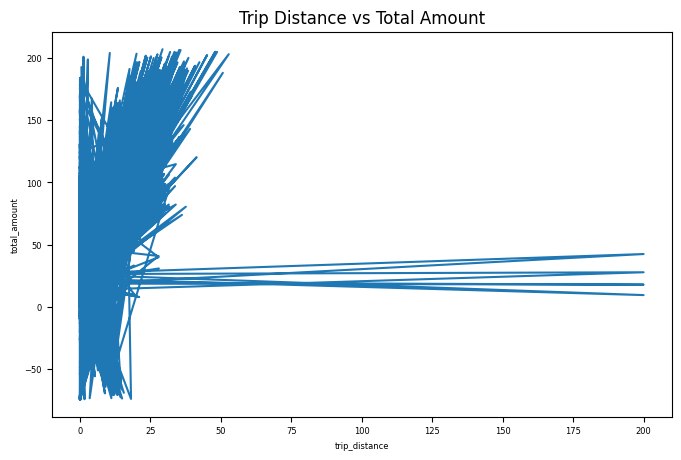

In [30]:
#plot y vs x
plt.rc('figure',figsize=(8,5))
plt.plot(cleansed_train_data['trip_distance'], cleansed_train_data['total_amount'])
plt.title('Trip Distance vs Total Amount')
plt.xlabel('trip_distance')
plt.ylabel('total_amount')

#show plot to user
plt.show()

**Understanding Corrrelation of Features**


 Target Label Corr:
 ID                       0.000878
VendorID                 0.043760
passenger_count          0.057795
trip_distance            0.878741
RatecodeID               0.055959
extra                    0.244916
tip_amount               0.666678
tolls_amount             0.697414
improvement_surcharge    0.202363
total_amount             1.000000
congestion_surcharge    -0.153333
Airport_fee              0.619435
total_amount_dist        0.998129
pickup_hour             -0.006198
ride_duration            0.191658
Name: total_amount, dtype: float64


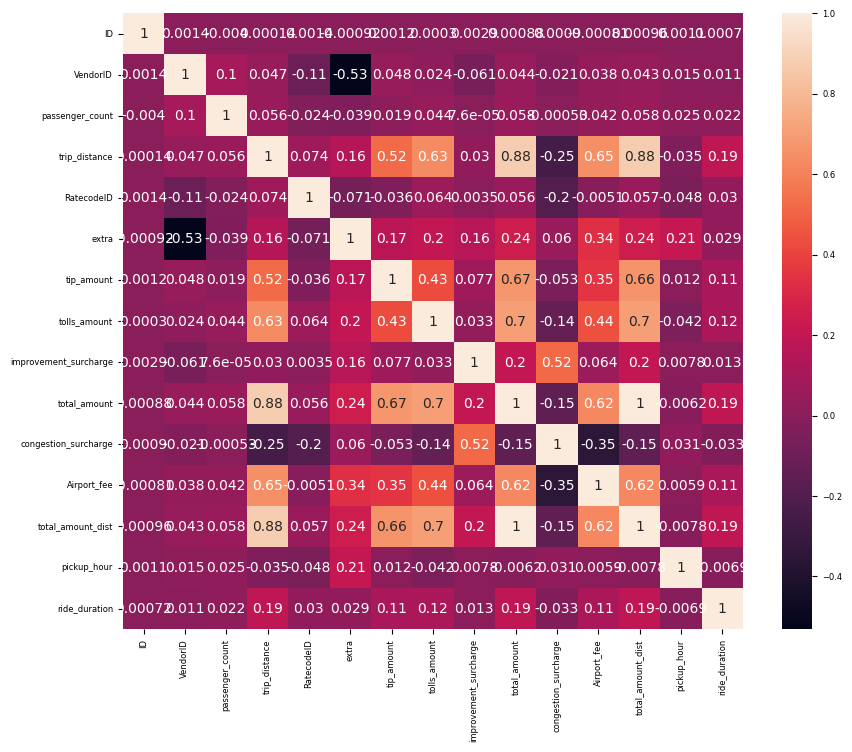

In [31]:
corr = cleansed_train_data.drop(['payment_type'], axis=1).corr()
#corr_no_us = cleansed_train_dataset.drop(['payment_type'], axis=1).corr()

mlt.rc('figure',figsize=(10,8))
sns.heatmap(corr, annot= True)
print("\n Target Label Corr:\n",  corr['total_amount']) 
#print("\n Target Label corr_no_us :\n",  corr_no_us['total_amount']) 


In [32]:
weak_corr_columns = corr[np.abs(corr['total_amount']) < 0.055 ]['total_amount'].index
print("\n Actual weak_corr_columns: ", weak_corr_columns)
#weak_corr_columns = ['passenger_count', 'RatecodeID', 'improvement_surcharge', 'pickup_hour'] 
weak_corr_columns = ['improvement_surcharge', 'pickup_hour'] 
cleansed_train_data_wkCorr = drop_columns_from_df(cleansed_train_data, weak_corr_columns)
#cleansed_train_data_new = drop_columns_from_df(cleansed_train_data_wkCorr, ['total_amount_dist'])

print("\n cleansed_train_data_wkCorr to Pre-Processor -> ", cleansed_train_data_wkCorr.shape)
print(cleansed_train_data_wkCorr.columns)
#display("\n",cleansed_train_data_new.head(2))


 Actual weak_corr_columns:  Index(['ID', 'VendorID', 'pickup_hour'], dtype='object')
Columns to drop from DF:  ['improvement_surcharge', 'pickup_hour']

 cleansed_train_data_wkCorr to Pre-Processor ->  (174669, 14)
Index(['ID', 'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'total_amount_dist',
       'ride_duration'],
      dtype='object')


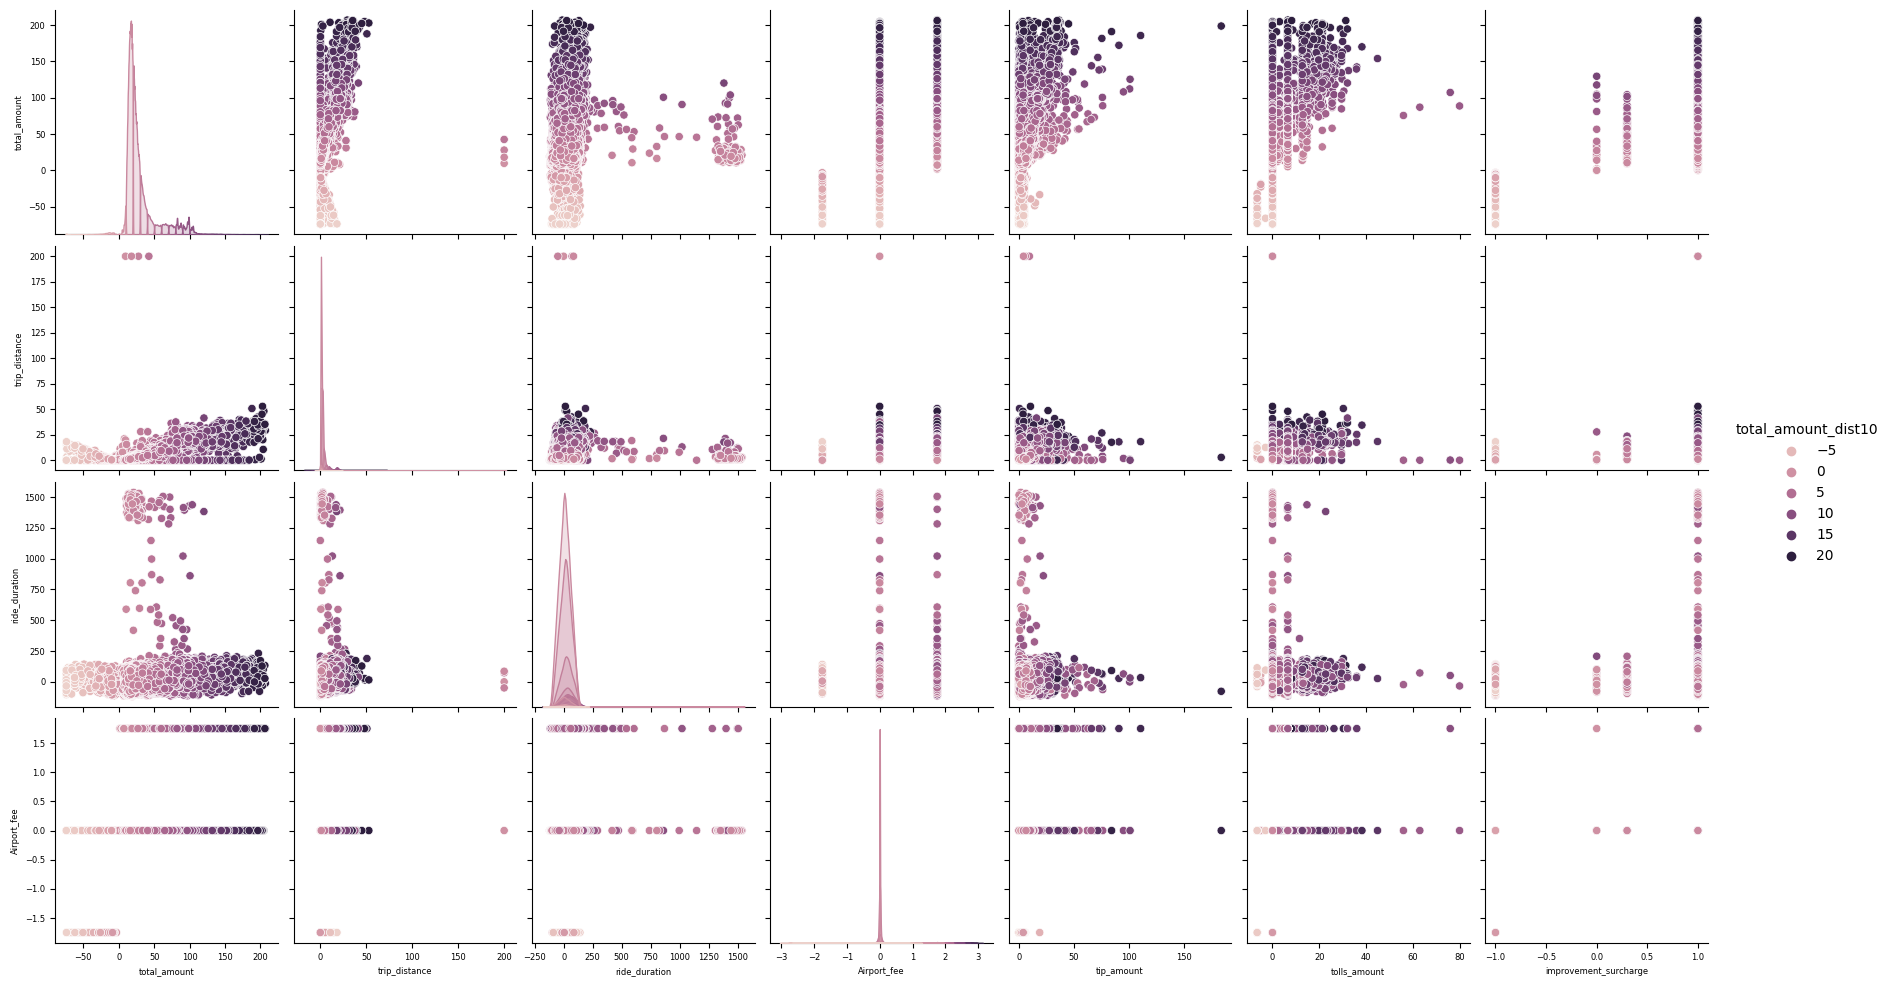

In [33]:
cleansed_train_data_plot = cleansed_train_data.copy()
cleansed_train_data_plot['total_amount_dist10'] = np.floor((cleansed_train_data_plot.total_amount)/10)
sns.pairplot(cleansed_train_data_plot, 
             hue="total_amount_dist10",
             x_vars=["total_amount", "trip_distance", "ride_duration","Airport_fee","tip_amount","tolls_amount","improvement_surcharge"],
             y_vars=["total_amount", "trip_distance", "ride_duration","Airport_fee"])

# Train-Validation Split (Stratified)

In [34]:
display(cleansed_train_data_wkCorr.columns)
labels=['total_amount']
#features = ['VendorID', 'passenger_count', 'trip_distance', 'payment_type', 'extra','tip_amount', 'tolls_amount', 'congestion_surcharge','Airport_fee', 'ride_duration']
features = cleansed_train_data_wkCorr.drop(['total_amount','total_amount_dist'], axis=1, inplace = False).columns
dist_col = ['total_amount_dist']
y = cleansed_train_data_wkCorr[labels]
y_dist = cleansed_train_data_wkCorr[dist_col].astype('int')
X = cleansed_train_data_wkCorr[features]
print("X shape: ", X.shape , " Y Shape: ", y.shape, " Y_dist Shape: ", y_dist.shape)

Index(['ID', 'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'total_amount_dist',
       'ride_duration'],
      dtype='object')

X shape:  (174669, 12)  Y Shape:  (174669, 1)  Y_dist Shape:  (174669, 1)


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
for train_index, test_index in split.split(X, y_dist):
    strat_train_set = X.iloc[train_index]
    strat_test_set  = X.iloc[test_index]
    strat_y_train   = y.iloc[train_index]
    strat_y_test    = y.iloc[test_index]
    
print("Train set: -> ", strat_train_set.shape, strat_y_train.shape)
print("Validation set: -> ", strat_test_set.shape, strat_y_test.shape)

Train set: ->  (139735, 12) (139735, 1)
Validation set: ->  (34934, 12) (34934, 1)


# Imputer & Scaling

In [36]:
#cleansed_train_data_new = strat_train_set.copy()
print(strat_train_set.columns)
print("cleansed_train_data shape: ", strat_train_set.shape)
strat_train_set.head(5)

Index(['ID', 'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount',
       'congestion_surcharge', 'Airport_fee', 'ride_duration'],
      dtype='object')
cleansed_train_data shape:  (139735, 12)


,ID,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,ride_duration
21366,21367,1,2.0,9.97,1.0,Credit Card,5.0,17.366643,6.55,2.5,1.75,11.616667
122411,122412,0,1.0,1.10,1.0,Credit Card,3.5,5.474023,0.00,2.5,0.00,-3.983333
167392,167393,1,1.0,0.58,1.0,Credit Card,0.0,6.200616,0.00,2.5,0.00,41.450000
116663,116664,1,1.0,2.60,1.0,Credit Card,2.5,6.716744,0.00,2.5,0.00,47.066667
164617,164618,1,1.0,3.60,1.0,Cash,0.0,0.465611,0.00,2.5,0.00,17.550000


> **Pre-processing**

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [38]:
cat_impute_OE_ecncode_feature = ['passenger_count', 'RatecodeID'] #,'RatecodeID',pickup_hour', ,'passenger_count'
cat_impute_OHE_ecncode_feature = ['VendorID','payment_type' ]
num_median_scale_feature = ['tip_amount','tolls_amount','congestion_surcharge','Airport_fee','extra'] #,'improvement_surcharge'
num_scale_feature = ['trip_distance','ride_duration']
labels = ['total_amount']

In [39]:
impute_median_scale = Pipeline([('impute1', SimpleImputer(strategy = 'median')), ('scale1', StandardScaler())])
#num_scale = Pipeline([ ('scale2', StandardScaler())])
num_scale = Pipeline([('impute2', SimpleImputer(strategy = 'median')), ('scale2', MinMaxScaler())])

impute_cat_encode = Pipeline([('impute3', SimpleImputer(strategy= 'most_frequent')), ('encode3', OrdinalEncoder())])
impute_cat_OHencode = Pipeline([('impute4', SimpleImputer(strategy= 'most_frequent')), ('encode4', OneHotEncoder())])

#num_const_cat = Pipeline([('impute2', SimpleImputer(strategy = 'mean')), ('encode3', OneHotEncoder())])
#impute_mean = Pipeline([('impute2', SimpleImputer(strategy = 'mean')), ('scale4', MinMaxScaler())])

In [40]:
preprocess = ColumnTransformer(
    [('num_impute_median', impute_median_scale, num_median_scale_feature), 
     ('num_scale', num_scale, num_scale_feature),
     ('impute_cat_OE', impute_cat_encode, cat_impute_OE_ecncode_feature),
     ('impute_cat_OHE', impute_cat_OHencode, cat_impute_OHE_ecncode_feature),
    ], remainder = 'passthrough', verbose_feature_names_out = True)

In [41]:
def apply_preprocessing_logic(cleansed_dataset, is_train_data):
    print("cleansed_train_data shape (before): ", cleansed_dataset.shape)
    transformed_X = preprocess.fit_transform(cleansed_dataset)
    prePreocessed_df = pd.DataFrame(transformed_X, columns=preprocess.get_feature_names_out())
    print("\n prePreocessed_df shape: ", prePreocessed_df.shape)
    
    print("\n Pre-processed set of Columns: ", prePreocessed_df.columns)
    """
    corr = prePreocessed_df.corr()
    
    if is_train_data:
        mlt.rc('figure',figsize=(12,10))
        sns.heatmap(corr, annot= True)
        print("\n Target Label Corr:\n",  corr['remainder__total_amount']) 
    """
    return prePreocessed_df

* > **Apply Pre-processing to Cleansed Train Data**

In [42]:
prePreocessed_Train = apply_preprocessing_logic(strat_train_set, True)

cleansed_train_data shape (before):  (139735, 12)

 prePreocessed_df shape:  (139735, 17)

 Pre-processed set of Columns:  Index(['num_impute_median__tip_amount', 'num_impute_median__tolls_amount',
       'num_impute_median__congestion_surcharge',
       'num_impute_median__Airport_fee', 'num_impute_median__extra',
       'num_scale__trip_distance', 'num_scale__ride_duration',
       'impute_cat_OE__passenger_count', 'impute_cat_OE__RatecodeID',
       'impute_cat_OHE__VendorID_0', 'impute_cat_OHE__VendorID_1',
       'impute_cat_OHE__VendorID_2', 'impute_cat_OHE__payment_type_Cash',
       'impute_cat_OHE__payment_type_Credit Card',
       'impute_cat_OHE__payment_type_UPI',
       'impute_cat_OHE__payment_type_Wallet', 'remainder__ID'],
      dtype='object')


In [43]:
cleansed_train_data.columns

Index(['ID', 'VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'total_amount_dist', 'pickup_hour', 'ride_duration'],
      dtype='object')

* > **Apply Pre-processing to Validation(Train) Data**

In [44]:
#Validation
print("Validation set: -> ", strat_test_set.shape, strat_y_test.shape)
prePreocessed_Validation = apply_preprocessing_logic(strat_test_set, True)
display(prePreocessed_Validation.shape)

Validation set: ->  (34934, 12) (34934, 1)
cleansed_train_data shape (before):  (34934, 12)

 prePreocessed_df shape:  (34934, 17)

 Pre-processed set of Columns:  Index(['num_impute_median__tip_amount', 'num_impute_median__tolls_amount',
       'num_impute_median__congestion_surcharge',
       'num_impute_median__Airport_fee', 'num_impute_median__extra',
       'num_scale__trip_distance', 'num_scale__ride_duration',
       'impute_cat_OE__passenger_count', 'impute_cat_OE__RatecodeID',
       'impute_cat_OHE__VendorID_0', 'impute_cat_OHE__VendorID_1',
       'impute_cat_OHE__VendorID_2', 'impute_cat_OHE__payment_type_Cash',
       'impute_cat_OHE__payment_type_Credit Card',
       'impute_cat_OHE__payment_type_UPI',
       'impute_cat_OHE__payment_type_Wallet', 'remainder__ID'],
      dtype='object')


(34934, 17)

* > ***Data Preprocessing - Test data***

In [45]:
test_data.head(3)
test_data_cleansed = cleansing_module(test_data, False)
test_data_cleansed_new = drop_columns_from_df(test_data_cleansed, weak_corr_columns)
display(test_data_cleansed_new.head(2))
test_data_preProcessed = apply_preprocessing_logic(test_data_cleansed_new, False)
#test_data_to_model = drop_columns_from_df(test_data_preProcessed, weak_corr_columns_tr)
print("\n----- Test Data to Model ----- \n")
display(test_data_preProcessed.head(5))
display(test_data_preProcessed.shape)

Count(original) of given dataset:  50000
Dataset Shape:  (50000, 16)
New Dataset Shape:  (50000, 17)
Max passenger_count:  8.0
Max Trip Distance:  200.0
After (update_payment_unknown_type):  VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64
Columns to drop from DF:  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
New DF shape:  (50000, 17)
New DF shape (after condition_based_df_update):  (50000, 17)
Columns to drop from DF:  ['store_and_fwd_flag', 'PULocationID', 'DOLocationID']

** updated shape after all changes:  (50

,ID,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,ride_duration
0,1,1,1.0,4.95,1.0,Credit Card,1.0,6.067612,0.0,2.5,0.0,4.0
1,2,1,1.0,2.10,1.0,Credit Card,2.5,6.191269,0.0,2.5,0.0,8.5


cleansed_train_data shape (before):  (50000, 12)

 prePreocessed_df shape:  (50000, 17)

 Pre-processed set of Columns:  Index(['num_impute_median__tip_amount', 'num_impute_median__tolls_amount',
       'num_impute_median__congestion_surcharge',
       'num_impute_median__Airport_fee', 'num_impute_median__extra',
       'num_scale__trip_distance', 'num_scale__ride_duration',
       'impute_cat_OE__passenger_count', 'impute_cat_OE__RatecodeID',
       'impute_cat_OHE__VendorID_0', 'impute_cat_OHE__VendorID_1',
       'impute_cat_OHE__VendorID_2', 'impute_cat_OHE__payment_type_Cash',
       'impute_cat_OHE__payment_type_Credit Card',
       'impute_cat_OHE__payment_type_UPI',
       'impute_cat_OHE__payment_type_Wallet', 'remainder__ID'],
      dtype='object')

----- Test Data to Model ----- 



,num_impute_median__tip_amount,num_impute_median__tolls_amount,num_impute_median__congestion_surcharge,num_impute_median__Airport_fee,num_impute_median__extra,num_scale__trip_distance,num_scale__ride_duration,impute_cat_OE__passenger_count,impute_cat_OE__RatecodeID,impute_cat_OHE__VendorID_0,impute_cat_OHE__VendorID_1,impute_cat_OHE__VendorID_2,impute_cat_OHE__payment_type_Cash,impute_cat_OHE__payment_type_Credit Card,impute_cat_OHE__payment_type_UPI,impute_cat_OHE__payment_type_Wallet,remainder__ID
0,-0.009108,-0.269008,0.298646,-0.296622,-0.473576,0.02475,0.025273,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.018942,-0.269008,0.298646,-0.296622,0.300199,0.01050,0.026211,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,-0.481769,-0.269008,0.298646,-0.296622,0.300199,0.00475,0.038342,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
3,0.165946,-0.269008,0.298646,-0.296622,0.816049,0.00400,0.027034,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4,-1.052238,-0.269008,-2.865651,-0.296622,-0.989426,0.02005,0.030353,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0


(50000, 17)

# Model Implementation

In [46]:
#Metrics for testing model's performance
import sklearn
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, scale, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
import time
import datetime

results_df = pd.DataFrame()
results = []
columns = ["Model", "DataSet" ,"pred_R2", "pred_min", "pred_max", "exec_start", "exec_end"]
print("Train set: -> ", strat_train_set.shape, strat_y_train.shape, prePreocessed_Train.shape)

def get_method_name():
    return inspect.currentframe().f_code.co_name

def evaluate_r2(true, predicted):
    r2_val = round(r2_score(true, predicted),4)
    return r2_val

def append_results(model_name, dataset_type, results_df, y_test, pred, exec_start):
    results_append = [model_name, dataset_type, evaluate_r2(y_test, pred), np.amin(pred), np.amax(pred), exec_start, datetime.datetime.now()]
    results.append(results_append)
    results_df = pd.DataFrame(data= results, columns=columns)
    return results_df.drop_duplicates()

def execute_model(model_n):
    """
    model_n : List, with model_no# to be executed
    This executes model in parallel and also maintains return value order as of input list
    """
    model = [models[i] for i in model_n]
    print("\n Models to be executed (in parallel, results in order): \n")
    for m in model:
        print(" - ", m.__name__)
    
    import concurrent.futures

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(m) for m in model]
        return_value = [f.result() for f in futures]
        print("\n No# of return values: ", len(return_value), "\n item-wise return object length:  ", [len(r) for r in return_value])
        
    print("\n ## Execution completed ## \n Final summary report: \n")
    #display(results)
    print(tabulate(results, headers='firstrow', tablefmt='fancy_grid'))
    return return_value

Train set: ->  (139735, 12) (139735, 1) (139735, 17)


# 1. Linear Regression with Polynomial Feature


In [47]:
def LinearRegression_with_polynomial():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + LinearRegression_with_polynomial.__qualname__ + " "
    """
    LinearRegression_with_polynomial
    """
    print("\n\n ############## Linear Regression with Polynomial Feature ############## \n\n")

    # Fit a polynomial regression model of degree 2
    lin_reg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression(fit_intercept=True))
    model = lin_reg.fit(prePreocessed_Train, strat_y_train)

    # training r2 sccore
    y_train_predict=model.predict(prePreocessed_Train)
    print(method, r2_score(y_train_predict,strat_y_train))

    #Checking min max of prediction
    print(method, "Predicted -Train: ", np.amin(y_train_predict), np.amax(y_train_predict))
    print(method, "Actuals -Train: ", np.amin(strat_y_train), np.amax(strat_y_train))
    append_results("Linear Regression",  "Train-training", results_df, strat_y_train, y_train_predict,exec_start)

    strat_train_set[y_train_predict <0 ] , strat_y_train[y_train_predict <0 ], y_train_predict[y_train_predict <0 ]
    #strat_train_set[y_train_predict > 150 ] , strat_y_train[y_train_predict > 150 ], y_train_predict[y_train_predict > 150 ]
    y_train_predict_df = pd.DataFrame(y_train_predict, columns= labels)


    #Validation Data - Linea with CV-HPT
    print(method, "\n On Validation set-")
    y_test_predict=model.predict(prePreocessed_Validation)
    #Checking min max of prediction
    print(method, "\nPredicted -Validation: ", np.amin(y_test_predict), np.amax(y_test_predict))
    print(method, "Actuals -Validation: ", np.amin(strat_y_test), np.amax(strat_y_test))
    append_results("Linear Regression",  "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    #Prediction
    print(method, "**Prediction on Test data using Linear Regression**")
    test_data_pred_linPoly=model.predict(test_data_preProcessed)
    test_data_pred_linPoly.shape

    append_results("Linear Regression",  "Test Data", results_df, np.zeros(test_data_pred_linPoly.shape), test_data_pred_linPoly,exec_start)

    #Delete variables no longer needed
    del lin_reg, model
    
    return test_data_pred_linPoly


# 2. Linear Regression with Cross Validation

In [48]:
def LinearRegression_with_CV():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + inspect.currentframe().f_back.f_code.co_name + " "
    """
    Linear Regression with Cross Validation
    """
    print(method, "\n\n ############## Linear Regression with Cross Validation ############## \n\n")

    # step-1: create a K-FOLD cross-validation scheme
    folds = KFold(n_splits = 3, shuffle = True, random_state = random_state)


    # step-2: specify range of hyperparameters to tune
    """
    param_grid = [{'n_features_to_select': np.arange(3, 9),
                  'estimator__fit_intercept': [True, False]}]
    """
    param_grid = [{'n_features_to_select': np.arange(5, 7),
                  'estimator__fit_intercept': [True]}]


    # step-3: perform grid search
    # 3.1 specify model
    lin_reg = LinearRegression()
    rfe = RFE(lin_reg)             

    #lin_reg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression(fit_intercept=True))
    #model = lin_reg.fit(prePreocessed_Train, strat_y_train)


    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                            param_grid = param_grid, 
                            scoring= 'r2', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True)      

    # fit the model
    model_cv.fit(prePreocessed_Train, strat_y_train)    

    print(method, 'Best Score: %s' % model_cv.best_score_)
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_lin_cv = model_cv.best_estimator_

    # training r2 sccore
    y_train_predict=model_lin_cv.predict(prePreocessed_Train)
    print(method, r2_score(y_train_predict,strat_y_train))

    # Display vals
    append_results("Linear Regression with CV",  "Train-training", results_df, strat_y_train, y_train_predict,exec_start)

    #Validation Data - Linea with CV-HPT
    print(method, "\n On Validation set-")
    y_test_predict=model_lin_cv.predict(prePreocessed_Validation)
    print(method, r2_score(y_test_predict,strat_y_test))
    append_results("Linear Regression with CV",  "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "**Prediction on Test data using Linear Regression with CV-HPT**")
    #Prediction
    test_data_pred_linCV=model_lin_cv.predict(test_data_preProcessed)
    test_data_pred_linCV.shape

    append_results("Linear Regression with CV",  "Test Data", results_df, np.zeros(test_data_pred_linCV.shape), test_data_pred_linCV,exec_start)

    #Delete variables no longer needed
    del lin_reg, rfe, model_cv, model_lin_cv
    
    return test_data_pred_linCV

# 3. KNN with HPT

In [49]:
def KNN_with_CV_HPT():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + inspect.currentframe().f_back.f_code.co_name + " "
    """
    KNN with HPT
    """
    print("\n\n ############## KNN with HPT ############## \n\n")

    from sklearn.neighbors import KNeighborsRegressor
    """
    KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=1, n_neighbors=8, p=2,
              weights='uniform') 
    weights{‘uniform’, ‘distance’}
    algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
    n_jobs : int
    When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    """

    # specify model
    knnReg = KNeighborsRegressor()  

    """
    # param_grid
    param_grid = [{'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'p': [1, 2],
                   'n_jobs': [10,20]
                  }]
    """
    #Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_jobs': 20, 'algorithm': 'auto'}

    param_grid = [{'weights': ['uniform', 'distance'],
                  'algorithm': ['auto'],
                   'p': [1, 2],
                   'n_jobs': [20, 30]
                  }]
    

    # call CV()
    model_cv = RandomizedSearchCV(estimator = knnReg, 
                                  param_distributions = param_grid, 
                                  scoring= 'r2', 
                                  cv = 3,
                                  verbose = 1,
                                  return_train_score=False,
                                  random_state=random_state)      

    # fit the model
    model_cv.fit(prePreocessed_Train, strat_y_train)    

    print(method, 'Best Score: %s' % model_cv.best_score_)
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_knn_cv = model_cv.best_estimator_

    # training r2 sccore
    y_train_predict=model_knn_cv.predict(prePreocessed_Train)
    print(method, r2_score(y_train_predict,strat_y_train))

    # Display vals
    append_results("KNN with CV",  "Train-training", results_df, strat_y_train, y_train_predict,exec_start)

    #Validation Data - KNN with CV-HPT
    print(method, "\n On Validation set-") 
    y_test_predict=model_knn_cv.predict(prePreocessed_Validation)
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("KNN with CV",  "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "**Test Data - KNN with CV-HPT***")
    #Prediction
    test_data_pred_knnCV=model_knn_cv.predict(test_data_preProcessed)
    test_data_pred_knnCV.shape

    append_results("KNN with CV",  "Test Data", results_df, np.zeros(test_data_pred_knnCV.shape), test_data_pred_knnCV,exec_start)

    #Delete variables no longer needed
    del model_knn_cv,  model_cv, knnReg
    
    return test_data_pred_knnCV

# 4. SVM/SVR

In [50]:
def SVM_SVR():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + inspect.currentframe().f_back.f_code.co_name + " "
    """
    SVM-SVR
    """
    print("\n\n ############## SVM/SVR ############## \n\n")

    from sklearn.svm import SVR
    """
    SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
    kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    degree: int, default=3 #Degree of the polynomial kernel function (‘poly’).
    gamma{‘scale’, ‘auto’} or float, default=’scale’
    tol, default=1e-3 #Tolerance for stopping criterion.
    C, default=1.0 #Regularization parameter. The strength of the regularization is inversely proportional to C. The penalty is a squared l2 penalty. +ve
    epsilon, default=0.1 #Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
    """
    # specify model
    svm = SVR()  

    """
    # param_grid
    param_grid = [{'kernel': ['poly', 'rbf'],
                   'degree': [ 2,3], 'tol': [0.001, 0.01],
                   'C': [0.1,1],
                   'epsilon': [0.1, 0.5] 
                  }]
    #Best Hyperparameters: {'C': 1, 'degree': 3, 'epsilon': 0.5, 'kernel': 'poly', 'tol': 0.001}
    """
    param_grid = [{'kernel': ['poly', 'rbf'],
                   'degree': [ 3], 'tol': [0.001],
                   'C': [0.1,1],
                   'epsilon': [0.5] 
                  }]

    # call CV()
    model_cv = GridSearchCV(estimator = svm, 
                            param_grid = param_grid, 
                            scoring= 'r2', cv = 2, 
                            verbose = 1, return_train_score=False)      
    #model_cv = SVR()

    # fit the model
    model_cv.fit(prePreocessed_Train.head(1000), strat_y_train.head(1000))    

    print(method, 'Best Score: %s' % model_cv.best_score_)
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_svm_cv = model_cv.best_estimator_
    #model_svm_cv = model_cv

    # training r2 sccore
    y_train_predict=model_svm_cv.predict(prePreocessed_Train)
    print(method, r2_score(y_train_predict,strat_y_train))

    # Display vals
    append_results("SVR",  "Train-training", results_df, strat_y_train, y_train_predict,exec_start)

    #Validation Data - SVM/SVR with CV-HPT
    print(method, "\n On Validation set-") 
    y_test_predict=model_svm_cv.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("SVR", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "***Test Data - SVR with CV-HPT***")
    #Prediction 
    test_data_pred_svrCV=model_svm_cv.predict(test_data_preProcessed) 
    test_data_pred_svrCV.shape

    append_results("SVR", "Test Data", results_df, np.zeros(test_data_pred_svrCV.shape), test_data_pred_svrCV,exec_start)

    #Delete variables no longer needed
    del model_svm_cv,  model_cv, svm
    
    return test_data_pred_svrCV

# 5. CART - DecisionTreeRegressor

In [51]:
def CART_DecisionTreeRegressor():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + CART_DecisionTreeRegressor.__qualname__ + " "
    """
    CART - classification and regression tasks
    """

    print(method, "\n\n ############## CART - DecisionTreeRegressor ############## \n\n")

    from sklearn import tree
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import ExtraTreesRegressor

    #Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand
    #min_samples_leaf=5 as an initial value.  min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems

    """
    reg= ExtraTreesRegressor()
    reg.fit(prePreocessed_Train, strat_y_train)

    print(method, "Important Features: ", reg.feature_importances_)
    feat_importances = pd.Series(reg.feature_importances_, index=prePreocessed_Train.columns)
    feat_importances.nlargest(8).plot(kind='barh')
    plt.show()
    """

    # create a regressor object 
    reg_decision_model=DecisionTreeRegressor(random_state = random_state)  

    """
    param_grid = [{'min_samples_leaf': [5, 8, 10, 15], 
                   'max_depth': [5, 10, 20, 50], 
                   'max_features': ['sqrt','log2', 'auto'], 
                   'splitter': ['best','random'], 
                   'ccp_alpha': [0.1,1,5] 
                  }]

    #Best Hyperparameters: {'ccp_alpha': 0.1, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 10, 'splitter': 'best'}
    """
    param_grid = [{'min_samples_leaf': [8, 10], 
                   'max_depth': [5, 20], 
                   'max_features': ['auto'], 
                   'splitter': ['best'], 
                   'ccp_alpha': [0.1] 
                  }]

    #call CV()
    model_cv = GridSearchCV(estimator = reg_decision_model, 
                            param_grid = param_grid, 
                            scoring= 'r2', 
                            cv = 2, 
                            verbose = 1, return_train_score=False)

    #fit the model
    model_cv.fit(prePreocessed_Train, strat_y_train)

    print(method, 'Best Score: %s' % model_cv.best_score_) 
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_dcTree = model_cv.best_estimator_

    #training r2 sccore
    y_train_predict=model_dcTree.predict(prePreocessed_Train) 
    print(method, r2_score(y_train_predict,strat_y_train))

    #Display vals
    append_results("Decision Tree Regressor with CV", "Train-training", results_df, strat_y_train, y_train_predict,exec_start)

    #Validation Data - Decision Tree Regressor 
    print(method, "\n On Validation set-") 
    y_test_predict=model_dcTree.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("Decision Tree Regressor with CV", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "***Test Data - DecisionTree Regressor CV-HPT***")
    #Prediction 
    test_data_pred_dcTree=model_dcTree.predict(test_data_preProcessed) 
    test_data_pred_dcTree.shape

    append_results("Decision Tree Regressor with CV", "Test Data", results_df, np.zeros(test_data_pred_dcTree.shape), test_data_pred_dcTree,exec_start)

    #Delete variables no longer needed
    del model_dcTree,  model_cv, reg_decision_model
    
    return test_data_pred_dcTree

**Bagging & Boosting**

- with bootstrap, trees are no longer perfect on the training set
- without bootstrap, all trees are perfect on the training set

    Bagging: The working principle is to build several base models independently and then to average them for final predictions 
        (either by voting or by averaging) to form a final prediction. 
        Most popular bagging estimator is 'Bagging Tress' also knows as 'Random Forest'.
        
        
    Boosting: Boosting models are built sequentially and tries to reduce the bias on final predictions.
        Gradient Boosting Machine (GBM)
        Extreme Gradient Boosting Machine (XGBM)
    
    Stacking: The predictions of each individual model are stacked together and used as input to a final estimator to compute the prediction.

# 6. Bagging - RandomForestRegressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve 
the predictive accuracy and control over-fitting. 
The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve 
the predictive accuracy and control over-fitting. 
The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [52]:
def BAGGING_RandomForestRegressor():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + BAGGING_RandomForestRegressor.__qualname__ + " "
    """
    RandomForestRegressor
    class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, 
    random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
    """
    print("\n\n ############## Bagging - RandomForestRegressor ############## \n\n")

    from sklearn.ensemble import RandomForestRegressor
    warnings.filterwarnings("ignore")

    #create CV
    kfold = KFold(n_splits=4, random_state=random_state, shuffle=True)
    
    # create a regressor object 
    rf_regr=RandomForestRegressor(random_state = random_state, n_jobs=-1)  

    n_samples = prePreocessed_Train.shape[0]
    n_features = prePreocessed_Train.shape[1]

    """
    param_grid = {'n_estimators': [500,100],
              'min_samples_split': [2, np.floor(n_samples//1000), 0.3 ],
              'min_samples_leaf': [2, 100 ],
              'criterion': ['friedman_mse', 'squared_error'],
              'max_features': ['sqrt', 1.0],
              'bootstrap':[True],
              'warm_start': [True],
              'ccp_alpha': [0.1, 0.01],
              'max_depth': [10, 50],
              'n_jobs': [None,30]
             }

    [INFO] BAGGING_RandomForestRegressor  Best Score: 0.9840257263573695
    [INFO] BAGGING_RandomForestRegressor  Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.01, 'criterion': 'friedman_mse',
            'max_depth': 40, 'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 
            'n_jobs': -1, 'warm_start': True}
    [INFO] BAGGING_RandomForestRegressor  0.987094990836529
    """

    param_grid = {'n_estimators': [90],
              'min_samples_split': [2],
              'min_samples_leaf': [2],
              'criterion': ['friedman_mse'],
              'max_features': [0.7],
              'bootstrap':[True],
              'warm_start': [True],
              'ccp_alpha': [0.01],
              'max_depth': [40],
              'n_jobs': [-1]
             }

    #call CV()
    model_cv = GridSearchCV(estimator = rf_regr, 
                                     param_grid=param_grid, 
                                     cv=kfold, 
                                     verbose=10,
                                     n_jobs=-1,
                                     scoring='r2')

    #fit the model
    model_cv.fit(prePreocessed_Train, np.ravel(strat_y_train))
    #model_cv.fit(prePreocessed_Train, np.ravel(strat_y_train))

    #plot_grid_search(model_cv)
    print(method, 'Best Score: %s' % model_cv.best_score_) 
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_RandForest = model_cv.best_estimator_

    #training r2 sccore
    y_train_predict=model_RandForest.predict(prePreocessed_Train) 
    print(method, r2_score(y_train_predict,strat_y_train))

    #Display vals
    append_results("Bagging - Random Forest", "Train-training", results_df, strat_y_train, y_train_predict,exec_start)
    
    ##Plot Tree
    from sklearn import tree
    tree.plot_tree(model_RandForest.estimators_[15])

    #Validation Data - Bagging - Random Forest
    print(method, "\n On Validation set-") 
    y_test_predict=model_RandForest.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("Bagging - Random Forest", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)

    print(method, "***Test Data - Bagging: Random Forest***")
    #Prediction 
    test_data_pred_randForest=model_RandForest.predict(test_data_preProcessed) 
    test_data_pred_randForest.shape

    append_results("Bagging - Random Forest", "Test Data", results_df, np.zeros(test_data_pred_randForest.shape), test_data_pred_randForest,exec_start)
    """
    print("**** On complete dataset *****")
    prePreocessed_X = apply_preprocessing_logic(X, True)
    display(prePreocessed_X.shape)
    #fit the model
    model_RandForest.fit(prePreocessed_X, np.ravel(y))

    print("\n On Validation set-") 
    y_test_predict=model_RandForest.predict(prePreocessed_Validation) 
    append_results("Bagging - model_RandForest - X", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)

    #Prediction 
    test_data_pred_X_RandForest=model_RandForest.predict(test_data_preProcessed) 
    display(test_data_pred_X_RandForest.shape)
    append_results("Bagging - model_RandForest - X", "Test Data", results_df, np.zeros(test_data_pred_X_RandForest.shape)
                   , test_data_pred_X_RandForest,exec_start)
    return test_data_pred_X_RandForest
    """

    return test_data_pred_randForest

> **Boosting - GradientBoostingRegressor**

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

# 7. GradientBoostingRegressor

In [53]:
def BOOSTING_GradientBoostingRegressor(): 
    exec_start=datetime.datetime.now()
    method = "[INFO] " + BOOSTING_GradientBoostingRegressor.__qualname__ + " "
    print(method, "\n\n ############## Boosting - GradientBoostingRegressor ############## \n\n")

    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import HistGradientBoostingRegressor
    """
    class sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, 
    criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
    init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
    """
    # create a regressor object 
    sgb_regr=GradientBoostingRegressor(random_state = random_state, warm_start=True)  

    """
    param_grid = [{'max_depth': [2, 5, 10 ],
                  'tol': [1e-7, 1e-5],
                  'min_samples_split': [2, 1000, 500 ],
                  'min_samples_leaf': [1, 50, 100 ],
                  'learning_rate': [0.1, 0.05],
                  'loss' : ['squared_error'],
                  'n_iter_no_change' : [5],
                   'n_estimators' : [100, 200],
                   'ccp_alpha' : [0.1, 0.01]
                 }]

    Best Score: 0.9304809346242513
    Best Hyperparameters: {'ccp_alpha': 0.01, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 10, 
                            'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 
                            'n_iter_no_change': 5, 'tol': 1e-07}
    0.9337132705860126
    """

    param_grid = [{'max_depth': [10 ],
                  'tol': [1e-7],
                  'min_samples_split': [2],
                  'min_samples_leaf': [1],
                  'learning_rate': [0.1],
                  'loss' : ['squared_error'],
                  'n_iter_no_change' : [5],
                   'n_estimators' : [100],
                   'ccp_alpha' : [0.01]
                 }]

    #call CV()
    model_cv = GridSearchCV(estimator = sgb_regr, 
                                     param_grid=param_grid, 
                                     n_jobs=-1, cv=3, 
                                     verbose=1)

    #fit the model
    model_cv.fit(prePreocessed_Train, np.ravel(strat_y_train))

    #plot_grid_search(model_cv)
    print(method, 'Best Score: %s' % model_cv.best_score_) 
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_gradBoost = model_cv.best_estimator_

    #training r2 sccore
    y_train_predict=model_gradBoost.predict(prePreocessed_Train) 
    print(method, r2_score(y_train_predict,strat_y_train))

    #Display vals
    append_results("Boosting - GradientBoost", "Train-training", results_df, strat_y_train, y_train_predict,exec_start)


    #Validation Data - Boosting - GradientBoostHist
    print(method, "\n On Validation set-") 
    y_test_predict=model_gradBoost.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("Boosting - GradientBoost", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "***Test Data - Boosting - GradientBoost***")
    #Prediction 
    test_data_pred_gradBoost=model_gradBoost.predict(test_data_preProcessed) 
    test_data_pred_gradBoost.shape

    append_results("Boosting - GradientBoost", "Test Data", results_df, np.zeros(test_data_pred_gradBoost.shape), test_data_pred_gradBoost,exec_start)
    
    del model_gradBoost, model_cv, sgb_regr
    return test_data_pred_gradBoost

# 8. HistGradientBoostingRegressor

In [54]:
def BOOSTING_HistGradientBoostingRegressor():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + BOOSTING_HistGradientBoostingRegressor.__qualname__ + " "
    print("\n\n ############## Boosting - HistGradientBoostingRegressor ############## \n\n")

    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import HistGradientBoostingRegressor
    """
    HistGradientBoostingRegressor estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000).
    This implementation is inspired by LightGBM.

    class sklearn.ensemble.HistGradientBoostingRegressor(loss='squared_error', *, quantile=None, learning_rate=0.1, max_iter=100, 
    max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, 
    monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, 
    n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)[source]¶
    """
    
    #create CV
    kfold = KFold(n_splits=5, random_state=random_state, shuffle=True)
    
    # create a regressor object 
    gb_regr=HistGradientBoostingRegressor(random_state = random_state)  

    """
    param_grid = [{'max_iter': [None, 300 ],
                      'tol': [1e-7],
                      'learning_rate': [0.1, 0.01],
                      'loss' : ['squared_error'],
                      'n_iter_no_change' : [5],
                       'max_depth': [None, 100, 10],
                       'max_leaf_nodes': [31, 50, 10, None],
                       'min_samples_leaf': [10, 20, 50, None],
                       'l2_regularization': [None, 0.1, 0.01],
                       'warm_start': [True, False],
                       'validation_fraction': [0.1]

                     }]

    [INFO] BOOSTING_HistGradientBoostingRegressor  Best Hyperparameters: {'l2_regularization': 0.01, 'learning_rate': 0.1,
            'loss': 'squared_error', 'max_depth': 10, 'max_iter': 300, 'max_leaf_nodes': 300, 'min_samples_leaf': 2, 
            'n_iter_no_change': 5, 'tol': 1e-07, 'validation_fraction': 0.1, 'warm_start': True}
    [INFO] BOOSTING_HistGradientBoostingRegressor  0.9900731561857561
    """

    param_grid = [{'max_iter': [ 300 ],
                  'tol': [1e-7, 1e-5],
                  'learning_rate': [0.1],
                  'loss' : ['squared_error'],
                  'n_iter_no_change' : [5],
                   'max_depth': [10],
                   'max_leaf_nodes': [300],
                   'min_samples_leaf': [2],
                   'l2_regularization': [0.01],
                   'warm_start': [True],
                   'validation_fraction': [0.1]
                   
                 }]

    #call CV()
    model_cv = GridSearchCV(estimator = gb_regr, 
                                     param_grid=param_grid,
                                     cv=kfold, 
                                     verbose=10,
                                     n_jobs=-1,
                                     scoring='r2')

    #fit the model
    model_cv.fit(prePreocessed_Train, np.ravel(strat_y_train))

    #plot_grid_search(model_cv)
    print(method, 'Best Score: %s' % model_cv.best_score_) 
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_gradBoostHist = model_cv.best_estimator_

    #training r2 sccore
    y_train_predict=model_gradBoostHist.predict(prePreocessed_Train) 
    print(method, r2_score(y_train_predict,strat_y_train))

    #Display vals
    append_results("Boosting - GradientBoostHist", "Train-training", results_df, strat_y_train, y_train_predict,exec_start)


    #Validation Data - Boosting - GradientBoostHist
    print(method, "\n On Validation set-") 
    y_test_predict=model_gradBoostHist.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("Boosting - GradientBoostHist", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "***Test Data - Boosting - GradientBoostHist***")
    #Prediction 
    test_data_pred_gradBoostHist=model_gradBoostHist.predict(test_data_preProcessed) 
    test_data_pred_gradBoostHist.shape

    append_results("Boosting - GradientBoostHist", "Test Data", results_df, np.zeros(test_data_pred_gradBoostHist.shape), test_data_pred_gradBoostHist,exec_start)
    
    print("**** On complete dataset *****")
    prePreocessed_X = apply_preprocessing_logic(X, True)
    display(prePreocessed_X.shape)
    #fit the model
    model_gradBoostHist.fit(prePreocessed_X, np.ravel(y))

    print("\n On Validation set-") 
    y_test_predict=model_gradBoostHist.predict(prePreocessed_Validation) 
    append_results("Boosting - model_gradBoostHist - X", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)

    #Prediction 
    test_data_pred_X_gradBoostHist=model_gradBoostHist.predict(test_data_preProcessed) 
    display(test_data_pred_X_gradBoostHist.shape)
    append_results("Boosting - model_gradBoostHist - X", "Test Data", results_df, np.zeros(test_data_pred_X_gradBoostHist.shape)
                   , test_data_pred_X_gradBoostHist,exec_start)

    del model_gradBoostHist, model_cv, gb_regr
    return test_data_pred_X_gradBoostHist

# 9. MLPRegressor

Multi-layer Perceptron regressor - is a class of feedforward artificial neural network. This model optimizes the squared error using LBFGS or stochastic gradient descent.


In [55]:
def MLPerceptronRegressor():
    exec_start=datetime.datetime.now()
    method = "[INFO] " + MLPerceptronRegressor.__qualname__ + " "
    print("\n\n ##############  MLP Regressor ############## \n\n")

    from sklearn.neural_network import MLPRegressor
    """
    class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, 
    solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
    max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
    """

    #create CV
    kfold = KFold(n_splits=3, random_state=random_state, shuffle=True)
    
    # create a regressor object 
    mlp_regr=MLPRegressor(random_state = random_state)  

    """
     param_grid = [{'solver': ['lbfgs', 'sgd' ],
                  'alpha': [0.0001, 0.01],
                  'early_stopping' : [True],
                  'n_iter_no_change' : [10],
                   'activation': ['logistic', 'tanh', 'relu'],
                   'learning_rate': ['invscaling', 'adaptive', 'constant'],
                   'tol': [0.0001, 1e-5],
                   'hidden_layer_sizes': [None, 150, 250],
                    'max_iter': [10000, None],
                 }]
    
     [INFO] MLPerceptronRegressor  Best Score: 0.5160482155861561
     [INFO] MLPerceptronRegressor  Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 
                 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'max_iter': 10000, 
                 'n_iter_no_change': 10, 'solver': 'lbfgs', 'tol': 0.0001}
     [INFO] MLPerceptronRegressor  0.5523925175829927           
    """

    param_grid = [{'solver': ['lbfgs'],
                  'alpha': [0.01],
                  'early_stopping' : [True],
                  'n_iter_no_change' : [10],
                   'activation': ['relu'],
                   'learning_rate': ['invscaling'],
                   'tol': [0.0001],
                   'hidden_layer_sizes': [150],
                    'max_iter': [10000],
                 }]

    #call CV()
    model_cv = GridSearchCV(estimator = mlp_regr, 
                                     param_grid=param_grid,  
                                     cv=kfold, 
                                     verbose=10,
                                     n_jobs=64,
                                     scoring='r2')

    #fit the model
    model_cv.fit(prePreocessed_Train, np.ravel(strat_y_train))

    #plot_grid_search(model_cv)
    print(method, 'Best Score: %s' % model_cv.best_score_) 
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_mlp = model_cv.best_estimator_

    #training r2 sccore
    y_train_predict=model_mlp.predict(prePreocessed_Train) 
    print(method, r2_score(y_train_predict,strat_y_train))

    #Display vals
    append_results("Multi-Layer Perceptron", "Train-training", results_df, strat_y_train, y_train_predict,datetime.datetime.now())


    #Validation Data - Multi-Layer Perceptron
    print(method, "\n On Validation set-") 
    y_test_predict=model_mlp.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("Multi-Layer Perceptron", "Train-Validation", results_df, strat_y_test, y_test_predict,datetime.datetime.now())
    
    print(method, "***Test Data - Multi-Layer Perceptron***")
    #Prediction 
    test_data_pred_mlp=model_mlp.predict(test_data_preProcessed) 
    test_data_pred_mlp.shape

    append_results("Multi-Layer Perceptron", "Test Data", results_df, np.zeros(test_data_pred_mlp.shape), test_data_pred_mlp,datetime.datetime.now())
    del model_mlp, model_cv, mlp_regr
    
    return test_data_pred_mlp
    

**-> - using Complete Train Data for Training**

In [56]:
"""
prePreocessed_X = apply_preprocessing_logic(X, True)
display(prePreocessed_X.shape)
#fit the model
model_gradBoost.fit(prePreocessed_X, np.ravel(y))

print("\n On Validation set-") 
y_test_predict=model_gradBoost.predict(prePreocessed_Validation) 
display(append_results("Boosting - model_gradBoost - X", "Train-Validation", results_df, strat_y_test, y_test_predict))

#Prediction 
test_data_pred_X_gradBoostHist=model_gradBoost.predict(test_data_preProcessed) 
display(test_data_pred_X_gradBoostHist.shape)
display(append_results("Boosting - model_gradBoost - X", "Test Data", results_df, np.zeros(test_data_pred_X_gradBoostHist.shape), test_data_pred_X_gradBoostHist))
"""

'\nprePreocessed_X = apply_preprocessing_logic(X, True)\ndisplay(prePreocessed_X.shape)\n#fit the model\nmodel_gradBoost.fit(prePreocessed_X, np.ravel(y))\n\nprint("\n On Validation set-") \ny_test_predict=model_gradBoost.predict(prePreocessed_Validation) \ndisplay(append_results("Boosting - model_gradBoost - X", "Train-Validation", results_df, strat_y_test, y_test_predict))\n\n#Prediction \ntest_data_pred_X_gradBoostHist=model_gradBoost.predict(test_data_preProcessed) \ndisplay(test_data_pred_X_gradBoostHist.shape)\ndisplay(append_results("Boosting - model_gradBoost - X", "Test Data", results_df, np.zeros(test_data_pred_X_gradBoostHist.shape), test_data_pred_X_gradBoostHist))\n'

# 10. Boosting - XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. Before running XGBoost, we must set three types of parameters: general parameters, booster parameters and task parameters (https://xgboost.readthedocs.io/en/latest/parameter.html):
- General parameters relate to which booster we are using to do boosting, commonly tree or linear model
- Booster parameters depend on which booster you have chosen
- Learning task parameters decide on the learning scenario. For example, regression tasks may use different parameters with ranking tasks.


In [57]:
def BOOSTING_XGBoost(): 
    exec_start=datetime.datetime.now()
    method = "[INFO] " + BOOSTING_XGBoost.__qualname__ + " "
    print("\n\n ############## Boosting - BOOSTING_XGBoost ############## \n\n")

    import xgboost as xgb
    import random
    """
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
       
    XGBoost comes with its own class for storing datasets called DMatrix. It is a highly optimized class for memory and speed. 
    That's why converting datasets into this format is a requirement for the native XGBoost API.
    """
    
    # Create regression matrices
    dtrain_reg = xgb.DMatrix(prePreocessed_Train, strat_y_train)
    dvalidation_reg = xgb.DMatrix(prePreocessed_Validation, strat_y_test)
    dtest_reg = xgb.DMatrix(test_data_preProcessed)
    
    # create a regressor object 
    #xgb_regr=xgb.XGBRegressor(random_state = random_state, evals = [(dtrain_reg, "train"), (dvalidation_reg, "validation")])
    xgb_regr=xgb.XGBRegressor(random_state = random_state)

    """
    param_grid = [{"objective": "reg:squarederror", "tree_method": "gpu_hist",
                   'early_stopping_rounds':[10, 50],
                   'n_estimators': [100],
                   'booster': ['gbtree'],
                   'learning_rate': [0.01], 
                   'max_depth': [5,10],
                   'n_jobs': [-1],
                   'colsample_bytree': uniform(0.9, 0.4),
                   'num_boost_round': [100]
                 }]
    """
    param_grid = [{"objective": ["reg:squarederror"], 
                   "tree_method": ["gpu_hist"],
                   'early_stopping_rounds':[10, 20],
                   'n_estimators': [100],
                   'booster': ['gbtree'],
                   'learning_rate': [0.01], 
                   'max_depth': [5,10],
                   'n_jobs': [-1],
                   'colsample_bytree': [0.4, 0.9]
                 }]

    #call CV()
    model_cv = RandomizedSearchCV(estimator = xgb_regr, 
                              param_distributions = param_grid, 
                              scoring='r2', 
                              cv = 3,
                              verbose = 10,
                              n_jobs=128,
                              return_train_score=True,
                              random_state=random_state,
                              n_iter=200) 

    #fit the model
    model_cv.fit(prePreocessed_Train, strat_y_train)

    #plot_grid_search(model_cv)
    print(method, 'Best Score: %s' % model_cv.best_score_) 
    print(method, 'Best Hyperparameters: %s' % model_cv.best_params_)

    model_gradBoost = model_cv.best_estimator_

    #training r2 sccore
    y_train_predict=model_gradBoost.predict(prePreocessed_Train) 
    print(method, r2_score(y_train_predict,strat_y_train))

    #Display vals
    append_results("Boosting - XGBoost", "Train-training", results_df, strat_y_train, y_train_predict,exec_start)


    #Validation Data - Boosting - GradientBoostHist
    print(method, "\n On Validation set-") 
    y_test_predict=model_gradBoost.predict(prePreocessed_Validation) 
    print(method, r2_score(y_test_predict,strat_y_test))

    append_results("Boosting - XGBoost", "Train-Validation", results_df, strat_y_test, y_test_predict,exec_start)
    
    print(method, "***Test Data - Boosting - XGBoost***")
    #Prediction 
    test_data_pred_gradBoost=model_gradBoost.predict(test_data_preProcessed) 
    test_data_pred_gradBoost.shape

    append_results("Boosting - XGBoost", "Test Data", results_df, np.zeros(test_data_pred_gradBoost.shape), test_data_pred_gradBoost,exec_start)
    
    del model_gradBoost, model_cv, sgb_regr
    return test_data_pred_gradBoost

In [58]:
models = {
    0: DummyClassifier,
    1: LinearRegression_with_polynomial,
    2: LinearRegression_with_CV,
    3: KNN_with_CV_HPT,
    4: SVM_SVR,
    5: CART_DecisionTreeRegressor,
    6: BAGGING_RandomForestRegressor,
    7: BOOSTING_GradientBoostingRegressor,
    8: BOOSTING_HistGradientBoostingRegressor,
    9: MLPerceptronRegressor,
    10: BOOSTING_XGBoost
}


 Models to be executed (in parallel, results in order): 

 -  BAGGING_RandomForestRegressor
 -  BOOSTING_HistGradientBoostingRegressor


 ############## Bagging - RandomForestRegressor ############## 




 ############## Boosting - HistGradientBoostingRegressor ############## 


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[INFO] BOOSTING_HistGradientBoostingRegressor  Best Score: 0.9577823732093439
[INFO] BOOSTING_HistGradientBoostingRegressor  Best Hyperparameters: {'l2_regularization': 0.01, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 10, 'max_iter': 300, 'max_leaf_nodes': 300, 'min_samples_leaf': 2, 'n_iter_no_change': 5, 'tol': 1e-07, 'validation_fraction': 0.1, 'warm_start': True}
[INFO] BOOSTING_HistGradientBoostingRegressor  0.9741655942396501
[INFO] BOOSTING_HistGradientBoostingRegressor  
 On Validation set-
[INFO] BOOSTING_HistGradientBoostingRegressor  0.07023686074737368
[INFO] BOOST

(174669, 17)


 On Validation set-


(50000,)

[CV 2/5; 1/2] START l2_regularization=0.01, learning_rate=0.1, loss=squared_error, max_depth=10, max_iter=300, max_leaf_nodes=300, min_samples_leaf=2, n_iter_no_change=5, tol=1e-07, validation_fraction=0.1, warm_start=True
[CV 2/5; 1/2] END l2_regularization=0.01, learning_rate=0.1, loss=squared_error, max_depth=10, max_iter=300, max_leaf_nodes=300, min_samples_leaf=2, n_iter_no_change=5, tol=1e-07, validation_fraction=0.1, warm_start=True;, score=0.958 total time=   7.5s
[CV 4/5; 1/2] START l2_regularization=0.01, learning_rate=0.1, loss=squared_error, max_depth=10, max_iter=300, max_leaf_nodes=300, min_samples_leaf=2, n_iter_no_change=5, tol=1e-07, validation_fraction=0.1, warm_start=True
[CV 4/5; 1/2] END l2_regularization=0.01, learning_rate=0.1, loss=squared_error, max_depth=10, max_iter=300, max_leaf_nodes=300, min_samples_leaf=2, n_iter_no_change=5, tol=1e-07, validation_fraction=0.1, warm_start=True;, score=0.954 total time=  17.4s
[CV 4/4; 1/1] START bootstrap=True, ccp_alpha=

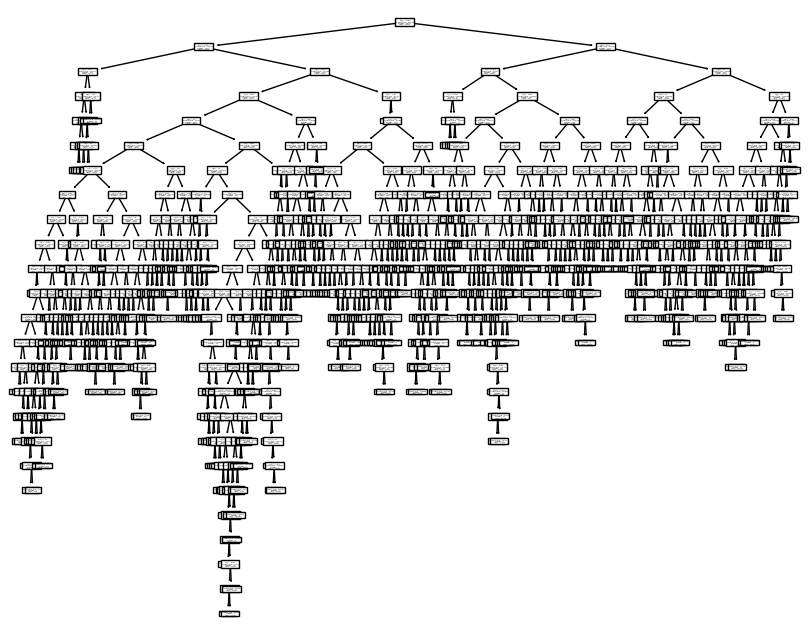

In [59]:
return_value = execute_model([6, 8])

#return_value = execute_model([6, 7, 8])

In [60]:
return_value[0]

array([34.96838683, 24.96555156, 15.84915628, ..., 21.34899546,
       37.94387188, 17.48254006])

**Results from different Model**

return_value = execute_model([6, 7, 8])

0.78/0.79
╒════════════════════════════════════╤══════════════════╤════════╤══════════════════════╤══════════════════════╤══════════════════════════════╤══════════════════════════════╕
│ Boosting - GradientBoostHist       │ Train-training   │   0.99 │   -28.86965311570945 │   145.47853258715259 │ 2023-11-01 15:23:13.034344   │ 2023-11-01 16:01:19.998921   │
╞════════════════════════════════════╪══════════════════╪════════╪══════════════════════╪══════════════════════╪══════════════════════════════╪══════════════════════════════╡
│ Boosting - GradientBoostHist       │ Train-Validation │ 0.9787 │             -21.9782 │              145.479 │ 2023-11-01 15:23:13.034344   │ 2023-11-01 16:01:22.336365   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Boosting - GradientBoostHist       │ Test Data        │ 0      │             -26.6709 │              147.01  │ 2023-11-01 15:23:13.034344   │ 2023-11-01 16:01:24.653118   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Boosting - model_gradBoostHist - X │ Train-Validation │ 0.982  │             -22.381  │              148.916 │ 2023-11-01 15:23:13.034344   │ 2023-11-01 16:07:12.280691   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Boosting - model_gradBoostHist - X │ Test Data        │ 0      │             -35.35   │              150.316 │ 2023-11-01 15:23:13.034344   │ 2023-11-01 16:07:12.886320   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Bagging - Random Forest            │ Train-training   │ 0.9873 │             -22.817  │              144.713 │ 2023-11-01 15:23:13.034874   │ 2023-11-01 16:07:13.424251   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Bagging - Random Forest            │ Train-Validation │ 0.9827 │             -22.7401 │              143.194 │ 2023-11-01 15:23:13.034874   │ 2023-11-01 16:07:13.561382   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Bagging - Random Forest            │ Test Data        │ 0      │             -22.5689 │              142.783 │ 2023-11-01 15:23:13.034874   │ 2023-11-01 16:07:13.734749   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Bagging - model_RandForest - X     │ Train-Validation │ 0.9827 │             -22.7401 │              143.194 │ 2023-11-01 15:23:13.034874   │ 2023-11-01 16:07:14.334281   │
├────────────────────────────────────┼──────────────────┼────────┼──────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Bagging - model_RandForest - X     │ Test Data        │ 0      │             -22.5689 │              142.783 │ 2023-11-01 15:23:13.034874   │ 2023-11-01 16:07:14.500203   │
╘════════════════════════════════════╧══════════════════╧════════╧══════════════════════╧══════════════════════╧══════════════════════════════╧══════════════════════════════╛

0.86
╒═══════════════════════════╤══════════════════╤══════════╤═════════════════════╤══════════════════════╤══════════════════════════════╤══════════════════════════════╕
│ Bagging - Random Forest   │ Train-training   │   0.9702 │   -73.1694272526326 │   192.71950739541327 │ 2023-11-02 14:28:27.728373   │ 2023-11-02 14:43:24.787740   │
╞═══════════════════════════╪══════════════════╪══════════╪═════════════════════╪══════════════════════╪══════════════════════════════╪══════════════════════════════╡
│ Bagging - Random Forest   │ Train-Validation │  0.97272 │            -72.7619 │              190.336 │ 2023-11-02 14:28:27.728373   │ 2023-11-02 14:43:24.890657   │
├───────────────────────────┼──────────────────┼──────────┼─────────────────────┼──────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ Bagging - Random Forest   │ Test Data        │   0      │            -60.5048 │              189.904 │ 2023-11-02 14:28:27.728373   │ 2023-11-02 14:43:25.041927   │
╘═══════════════════════════╧══════════════════╧══════════╧═════════════════════╧══════════════════════╧══════════════════════════════╧══════════════════════════════╛


# Submission Block

In [61]:
test_data_pred_final = return_value[0]
print("Final Test result -> shape: ", test_data_pred_final.shape, " , min: ", np.amin(test_data_pred_final), " , max: ", np.amax(test_data_pred_final))

Final Test result -> shape:  (50000,)  , min:  -60.50481997192078  , max:  189.90415438522817


In [62]:
print(test_data_pred_final.shape)
sample_submission_data= pd.DataFrame(test_data_pred_final,columns=["total_amount"])
sample_submission_data['ID'] = sample_submission_data.index + 1
sample_submission_data = sample_submission_data[["ID", "total_amount"]]
print('sample_submission_data :', sample_submission_data.shape)
sample_submission_data.to_csv('submission.csv', index = False)
print("THANKS!!")

(50000,)
sample_submission_data : (50000, 2)
THANKS!!
